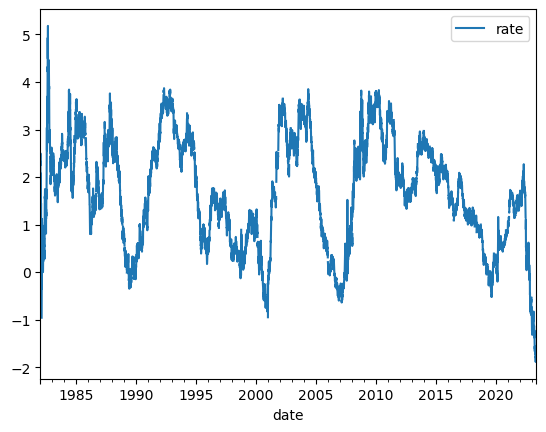

,id,date,rate
0,1,1982-01-04,2.32
1,2,1982-01-05,2.24
2,3,1982-01-06,2.43
3,4,1982-01-07,2.46
4,5,1982-01-08,2.50


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/db.sqlite')
yield_df = pd.read_sql_query("SELECT * FROM yield_curve", conn)
yield_df["rate"] = pd.to_numeric(yield_df["rate"], errors="coerce")
yield_df["date"] = pd.to_datetime(yield_df["date"])

yield_df.plot(x="date", y="rate")
plt.show()
yield_df.head()


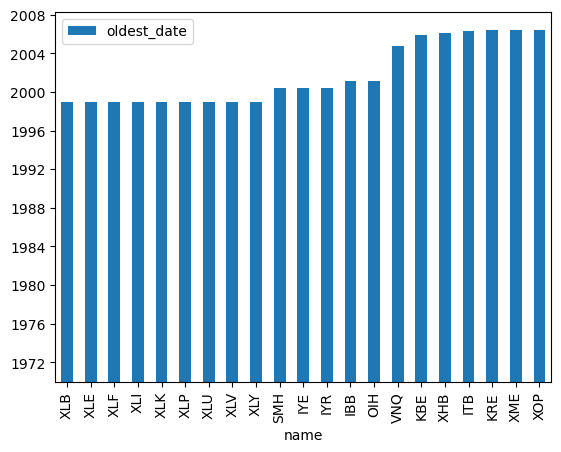

,open,name,oldest_date
0,20.781250,XLB,1998-12-21
1,23.312500,XLE,1998-12-21
2,19.052092,XLF,1998-12-21
3,23.203125,XLI,1998-12-21
4,32.406250,XLK,1998-12-21
5,25.875000,XLP,1998-12-21
6,30.250000,XLU,1998-12-21
7,24.812500,XLV,1998-12-21
8,25.312500,XLY,1998-12-21
9,48.750000,SMH,2000-06-05


In [6]:
df1 = pd.read_sql_query("SELECT open, name, MIN(date) AS oldest_date FROM sector_etfs GROUP BY name ORDER BY oldest_date;", conn)

df1["oldest_date"] = pd.to_datetime(df1["oldest_date"])

df1.plot(kind="bar", x="name", y="oldest_date")
plt.show()
df1.head(22)

In [34]:
etf_df = pd.read_sql_query("SELECT * FROM sector_etfs;", conn)
etf_df["date"] = pd.to_datetime(etf_df["date"])
etf_df["open"] = pd.to_numeric(etf_df["open"], errors="coerce")
etf_df["close"] = pd.to_numeric(etf_df["close"], errors="coerce")
etf_df["high"] = pd.to_numeric(etf_df["high"], errors="coerce")
etf_df["low"] = pd.to_numeric(etf_df["low"], errors="coerce")

start_date = '2006-08-01'

etf_df = etf_df.loc[etf_df['date'] >= start_date]

etf_df.set_index('date', inplace=True)

etf_df

,id,name,open,high,low,close,volume
date,,,,,,,
2006-08-07,287,IBB,23.643333,23.763332,22.873333,22.973333,16116600
2006-08-14,288,IBB,23.166668,24.096666,22.920000,24.063334,18314400
2006-08-21,289,IBB,23.803333,24.163334,23.706667,24.133333,8110200
2006-08-28,290,IBB,24.166668,25.026667,24.059999,24.776667,13446900
2006-09-04,291,IBB,24.676666,24.793333,23.790001,24.073334,16305000
...,...,...,...,...,...,...,...
2023-05-01,23745,XOP,125.269997,127.430000,115.889999,120.330002,27125500
2023-05-08,23746,XOP,123.400002,124.120003,116.860001,119.019997,19526000
2023-05-15,23747,XOP,120.169998,124.919998,117.720001,123.040001,20952300


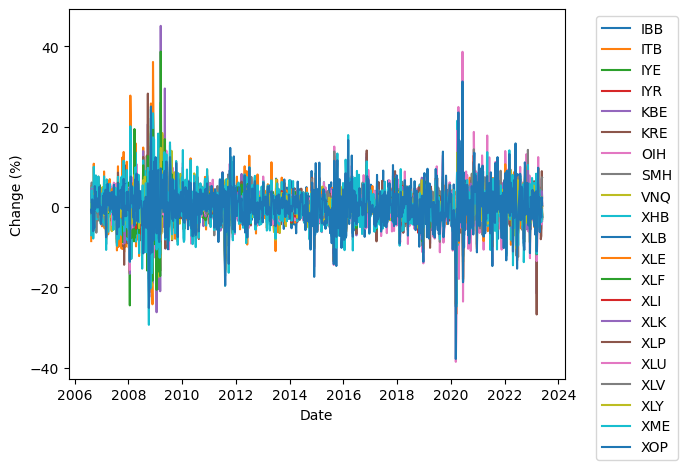

In [36]:
if 'change' not in etf_df.columns:
    etf_df['change'] = etf_df['open'].pct_change() * 100
    etf_df.dropna(inplace=True)

    etf_df = etf_df.loc[etf_df.index >= "2006-08-08"]

fig, ax1 = plt.subplots()
for name in etf_df['name'].unique():
    if name == None:
        continue
    data = etf_df[etf_df['name'] == name]
    ax1.plot(data.index, data['change'], label=name)

ax1.set_ylabel('Change (%)')
ax1.set_xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

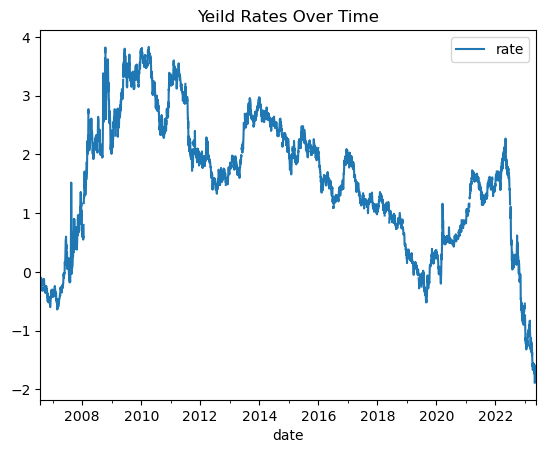

In [39]:
yield_df = yield_df.loc[yield_df['date'] >= start_date]

yield_df.plot(x="date", y="rate", title="Yeild Rates Over Time")
plt.show()

In [ ]:
fig, ax1 = plt.subplots(ncols=2, nrows=11, figsize=(20, 100))
for i, sector in enumerate(etf_df["name"].unique()):
    if sector == None:
        continue

    sect_df = etf_df[etf_df['name'] == sector]
    ax1_flat = ax1.flatten()
    ax2_flat = ax1_flat[i].twinx()
    ax1_flat[i].plot(sect_df.index, sect_df['close'])
    ax2_flat.plot(yield_df['date'], yield_df['rate'], color='orange')
    ax1_flat[i].set_ylabel("Price")
    ax2_flat.set_ylabel("Yield Rate (%)", color="orange")

    ax1_flat[i].set_title(f"{sector} Vs Yield Curve")

plt.show()

In [63]:
unrate_df = pd.read_sql_query("SELECT * FROM unemployment_rate", conn)
unrate_df["rate"] = pd.to_numeric(unrate_df["rate"], errors="coerce")
unrate_df["date"] = pd.to_datetime(unrate_df["date"])

unrate_df = unrate_df.loc[unrate_df["date"] >= start_date]

unrate_df.head()

,id,date,rate
703,704,2006-08-01,4.7
704,705,2006-09-01,4.5
705,706,2006-10-01,4.4
706,707,2006-11-01,4.5
707,708,2006-12-01,4.4


In [69]:
sector_etfs = {
  "XLY": "Consumer Discretionary Select Sector SPDR® Fund",
  "XLP": "Consumer Staples Select Sector SPDR® Fund",
  "XLE": "Energy Select Sector SPDR® Fund",
  "XLF": "Financial Select Sector SPDR® Fund",
  "XLV": "Health Care Select Sector SPDR® Fund",
  "XLI": "Industrial Select Sector SPDR® Fund",
  "IBB": "iShares Biotechnology ETF",
  "IYE": "iShares U.S. Energy ETF",
  "ITB": "iShares U.S. Home Construction ETF",
  "IYR": "iShares U.S. Real Estate ETF",
  "XLB": "Materials Select Sector SPDR® Fund",
  "KBE": "SPDR® S&P Bank ETF",
  "XHB": "SPDR® S&P Homebuilders ETF",
  "XME": "SPDR® S&P Metals and Mining ETF",
  "XOP": "SPDR® S&P Oil & Gas Exploration & Production ETF",
  "KRE": "SPDR® S&P Regional Banking ETF",
  "XTL": "SPDR® S&P Telecom ETF",
  "XLK": "Technology Select Sector SPDR® Fund",
  "XLU": "Utilities Select Sector SPDR® Fund",
  "GDXJ": "VanEck Junior Gold Miners ETF",
  "OIH": "VanEck Oil Services ETF",
  "SMH": "VanEck Semiconductor ETF",
  "VNQ":"Vanguard Real Estate Index Fund ETF Shares"
}


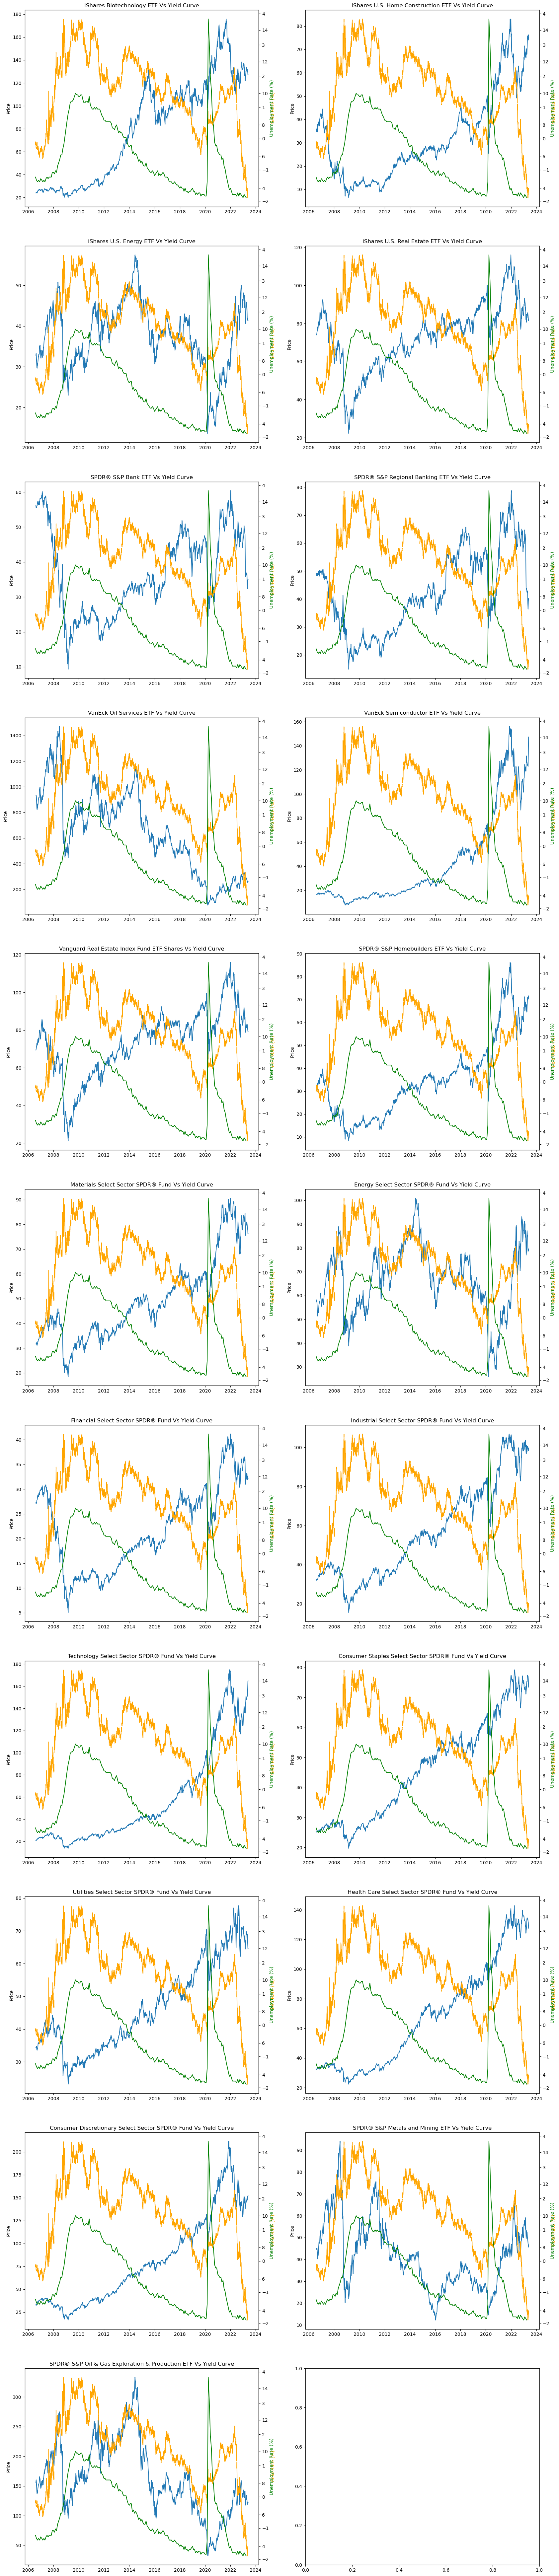

In [70]:
fig, ax1 = plt.subplots(ncols=2, nrows=11, figsize=(20, 100))
for i, sector in enumerate(etf_df["name"].unique()):
    if sector == None:
        continue

    sect_df = etf_df[etf_df['name'] == sector]
    ax1_flat = ax1.flatten()[i]
    ax2_flat = ax1_flat.twinx()
    ax3_flat = ax1_flat.twinx()
    ax1_flat.plot(sect_df.index, sect_df['close'])
    ax2_flat.plot(yield_df['date'], yield_df['rate'], color='orange')
    ax3_flat.plot(unrate_df['date'], unrate_df['rate'], color='green')
    ax1_flat.set_ylabel("Price")
    ax2_flat.set_ylabel("Yield Rate (%)", color="orange")
    ax3_flat.set_ylabel("Unemployment Rate (%)", color="green")

    ax1_flat.set_title(f"{sector_etfs[sector]} Vs Yield Curve")

plt.show()